In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read in the CSV file
df = pd.read_csv('Datasets/Environment_Solar_Data.csv')
df = df[df.sunshine_hours != 1000]
# Select the columns to use for the x-axis and y-axis of the scatter plot
x = df['sunshine_hours']
y = df['land_prices']
# Select the columns to use for the x-axis and y-axis of the scatter plot
lon = df['Longitude']
lat = df['Latitude']



In [56]:
(df['Date'][500])

'9/1/2018'

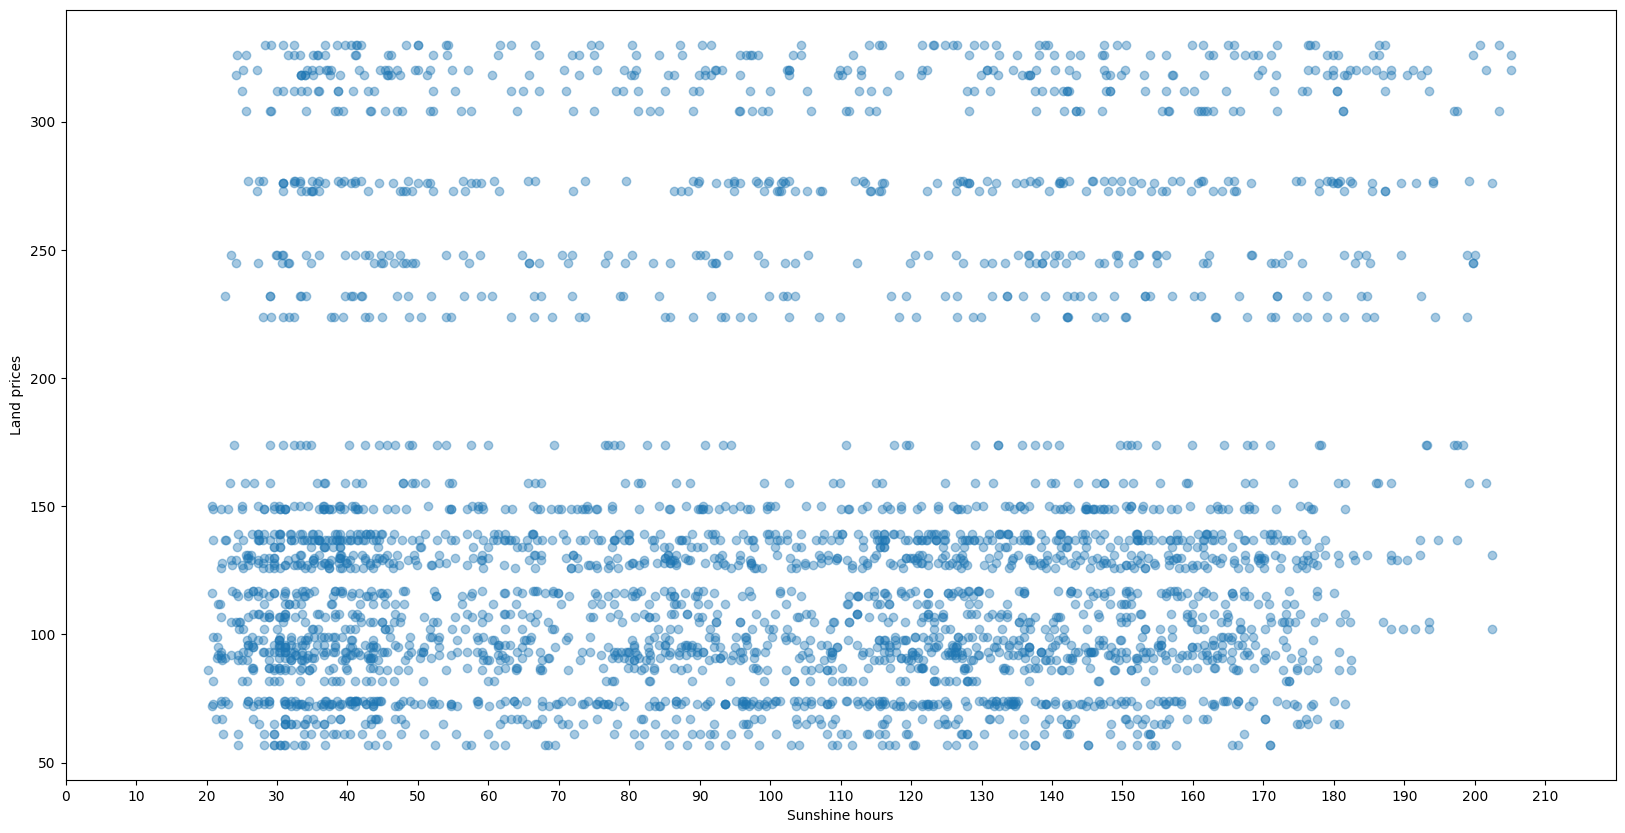

In [57]:
# Create the scatter plot
plt.rcParams['figure.figsize'] = [20, 10]
plt.scatter(x, y,  marker='o', alpha=0.4)

plt.xlim([0, 220])
plt.xticks(np.arange(0, 220, 10))

# # Label the x-axis and y-axis
plt.xlabel('Sunshine hours')
plt.ylabel('Land prices')
# plt.plot(lon, lat, c= "r")
# Show the plot
plt.show()

In [58]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, marker='o', alpha=0.4)
#     ax.xlim([0, 220])
    

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = 220

    bins = np.arange(0, lim)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

# Start with a square Figure.
plt.rcParams['figure.figsize'] = [10, 5]
fig = plt.figure()
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
# ax.plot(np.arange(0, 220, 10))
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)


# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
# fig.show()

In [59]:
# Select the columns to use for the x-axis and y-axis of the scatter plot
x = df['Longitude']
y = df['Latitude']

# Create the scatter plot
plt.rcParams['figure.figsize'] = [20, 10]
plt.scatter(x, y,  marker='o', alpha=0.4)

# Label the x-axis and y-axis
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [60]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
v = df['land_prices']
x = df['Longitude']
y = df['Latitude']
z = df['sunshine_hours']
ax.scatter(x, y, v, alpha=0.4)
ax.scatter(x, y, c = "r")
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

plt.show()

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Datasets/Environment_Solar_Data.csv')
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, n_init=10))
])


In [62]:
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, n_init=10))])

In [63]:
X = df[['sunshine_hours', 'land_prices', 'Latitude', 'Longitude', 'Avg.Wind_Speed']]
pipeline.fit(X)

cluster_labels = pipeline.predict(X)
df['cluster_with_ws'] = cluster_labels

X2 = df[['sunshine_hours', 'land_prices', 'Latitude', 'Longitude']]
pipeline.fit(X2)
cluster_labels = pipeline.predict(X2)
df['cluster_no_ws'] = cluster_labels


X3 = df[['sunshine_hours', 'land_prices', 'Avg.Wind_Speed']]
pipeline.fit(X3)
cluster_labels = pipeline.predict(X3)
df['cluster_no_location'] = cluster_labels
df.to_csv('output_custer.csv', index=False)


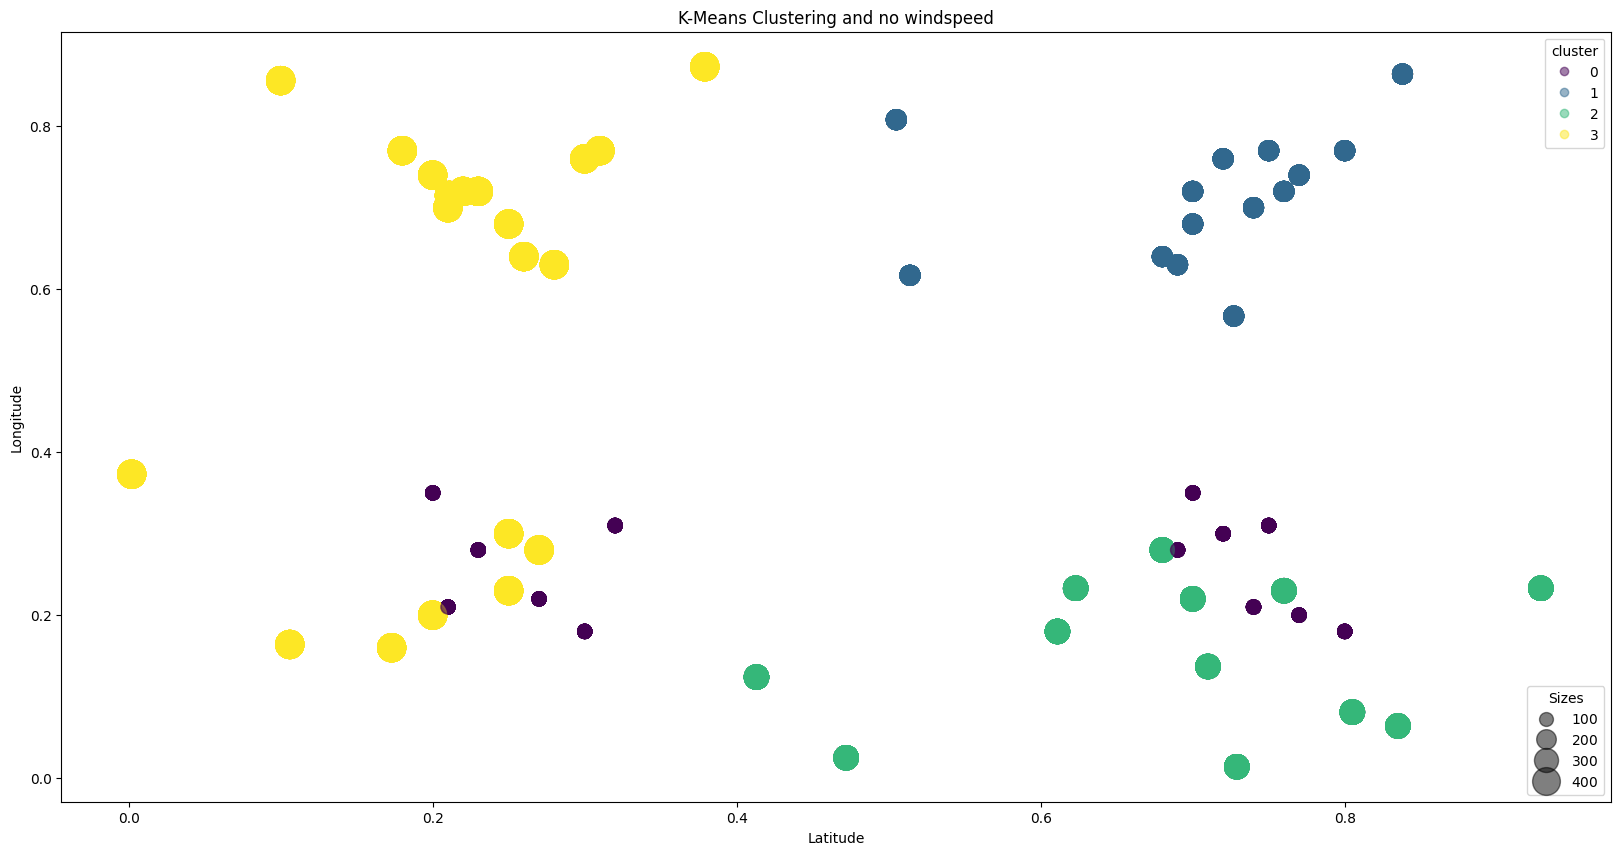

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline as imbPipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

df = pd.read_csv('output_custer.csv')
fig, ax = plt.subplots()
scatter = ax.scatter(df['Latitude'], df['Longitude'], c=df['cluster_no_ws'], s=((df['cluster_no_ws']+1)*100), marker='o', alpha = 0.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="cluster")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements("sizes")
legend2 = ax.legend(handles, labels, loc="lower right", title="Sizes")
ax.set_title('K-Means Clustering and no windspeed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

In [65]:
plt.rcParams['figure.figsize'] = [20, 10]

df = pd.read_csv('output_custer.csv')
fig, ax = plt.subplots()
scatter = ax.scatter(df['Latitude'], df['Longitude'], c=df['cluster_with_ws'], s=((df['cluster_with_ws']+1)*100), marker='o', alpha = 0.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="cluster")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements("sizes")
legend2 = ax.legend(handles, labels, loc="lower right", title="Sizes")
ax.set_title('K-Means Clustering with windspeed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

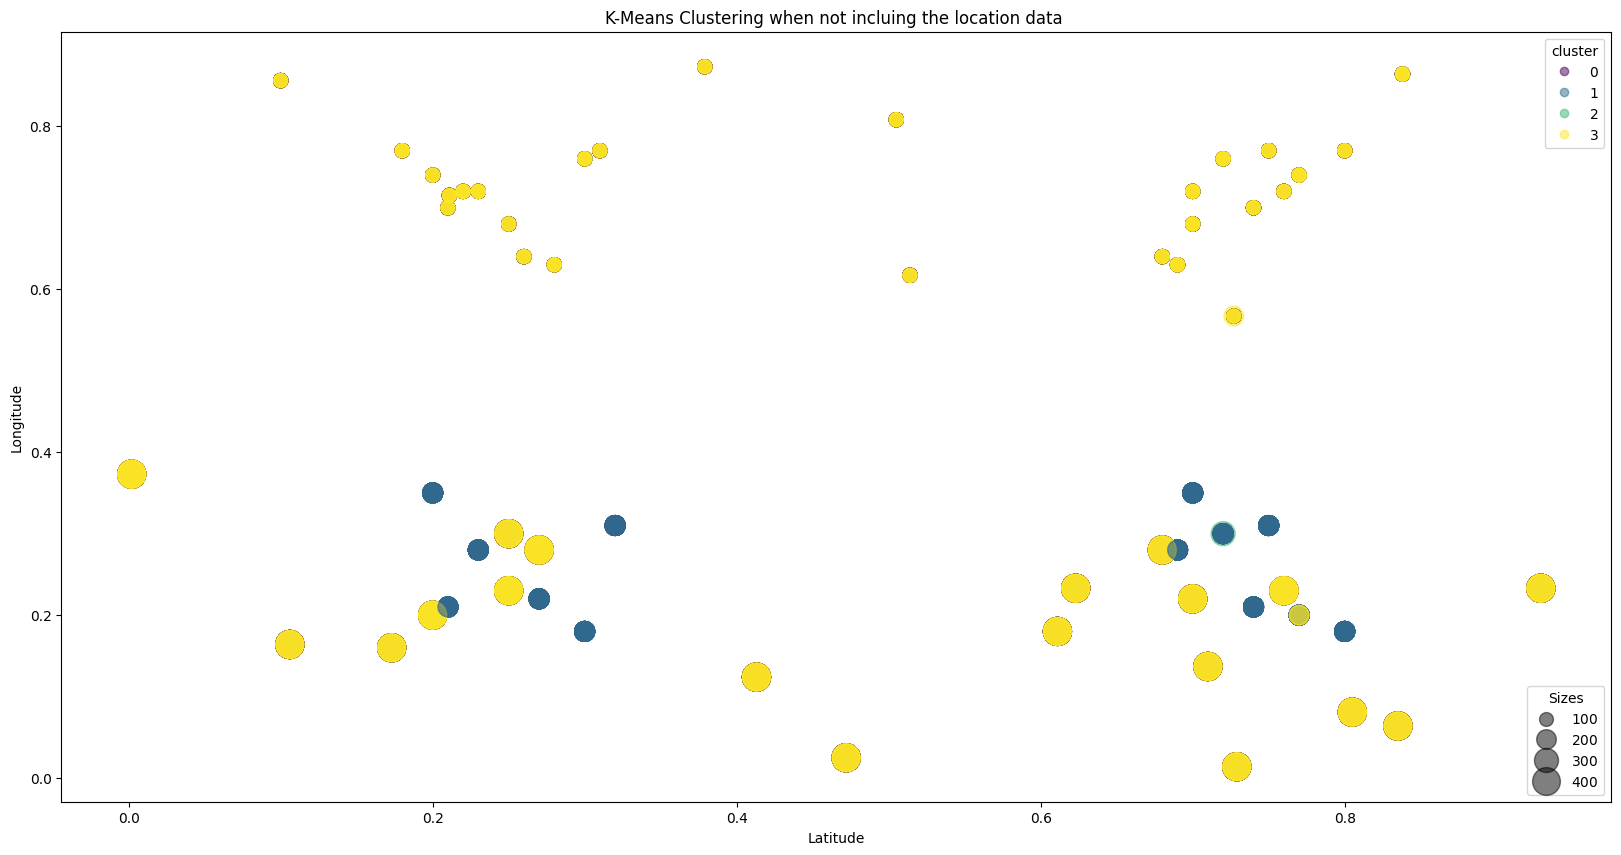

In [66]:
plt.rcParams['figure.figsize'] = [20, 10]

df = pd.read_csv('output_custer.csv')
fig, ax = plt.subplots()
scatter = ax.scatter(df['Latitude'], df['Longitude'], c=df['cluster_no_location'], s=((df['cluster_with_ws']+1)*100), marker='o', alpha = 0.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="cluster")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements("sizes")
legend2 = ax.legend(handles, labels, loc="lower right", title="Sizes")
ax.set_title('K-Means Clustering when not incluing the location data ')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/Environment_Solar_Data.csv')

model = AgglomerativeClustering(n_clusters=4)

X = df[['sunshine_hours', 'land_prices', 'Latitude', 'Longitude', 'Avg.Wind_Speed']]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
model.fit(X_imputed)

df['cluster'] = model.labels_
df.to_csv('output_custer_hierach.csv', index=False)
fig, ax = plt.subplots()
scatter = ax.scatter(df['Latitude'], df['Longitude'], c=df['cluster'], s=((df['cluster']+1)*100), marker='o', alpha = 0.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="cluster")
ax.add_artist(legend1)
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
# plt.scatter(df['Latitude'], df['Longitude'], c=df['cluster'], s=df['cluster']*100)
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.title('Hierarchical Clustering Results')

# unique_labels = np.unique(df['cluster'])
# legend_handles = [plt.Line2D([], [], color=plt.cm.get_cmap('viridis')(label/len(unique_labels)), linewidth=5) for label in unique_labels]
# plt.legend(legend_handles, unique_labels)

plt.show()

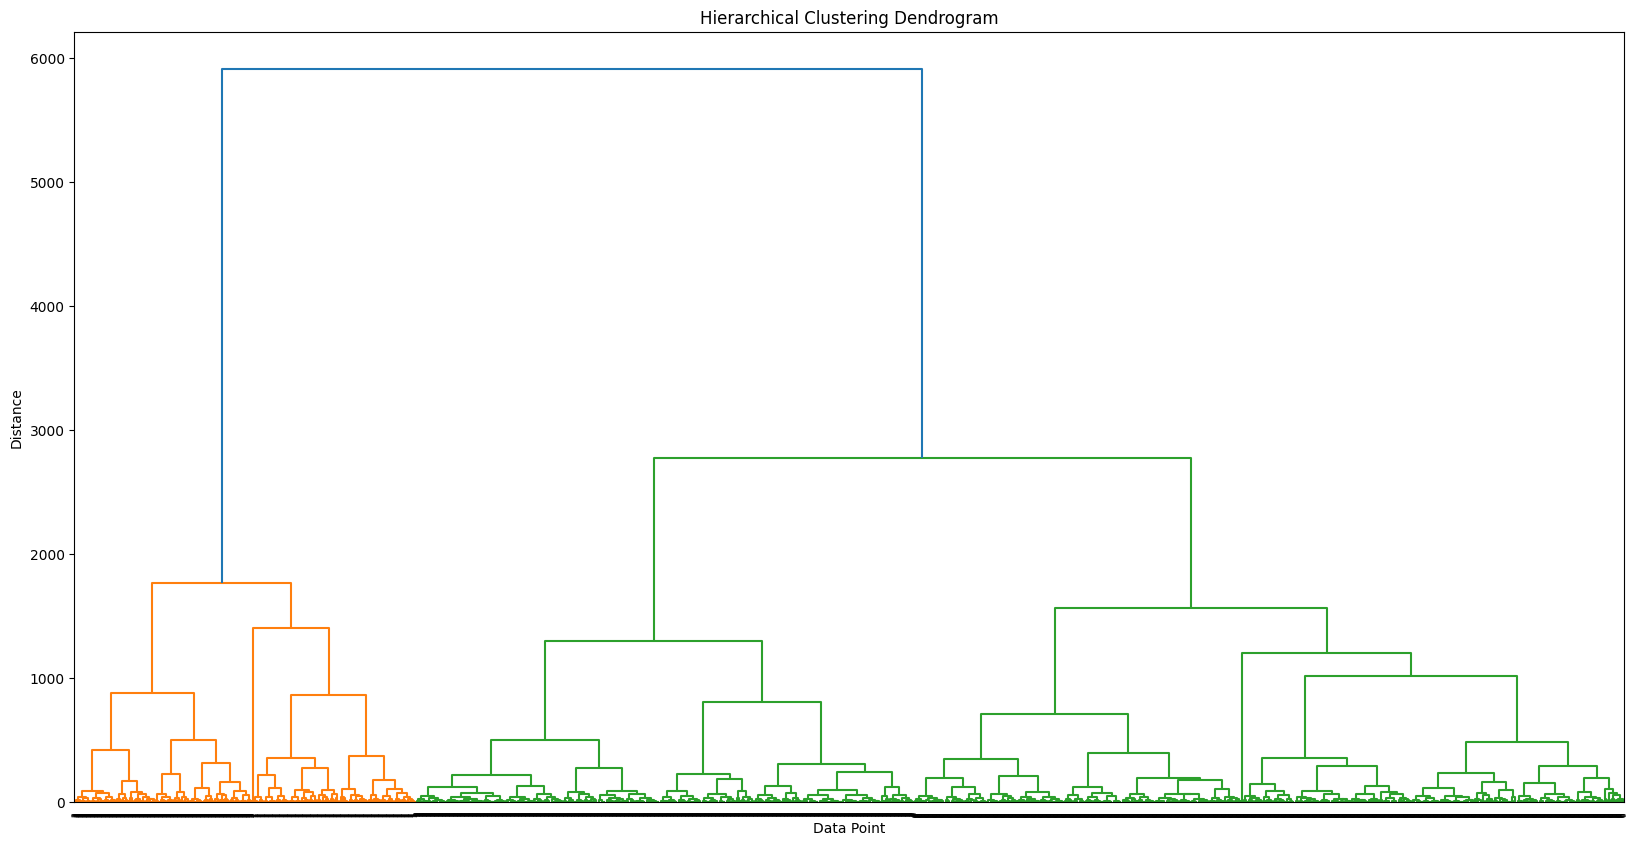

In [68]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X_imputed, 'ward')
dendrogram(Z, labels=df['cluster'].tolist())
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Text(0, 0.5, 'Longitude')

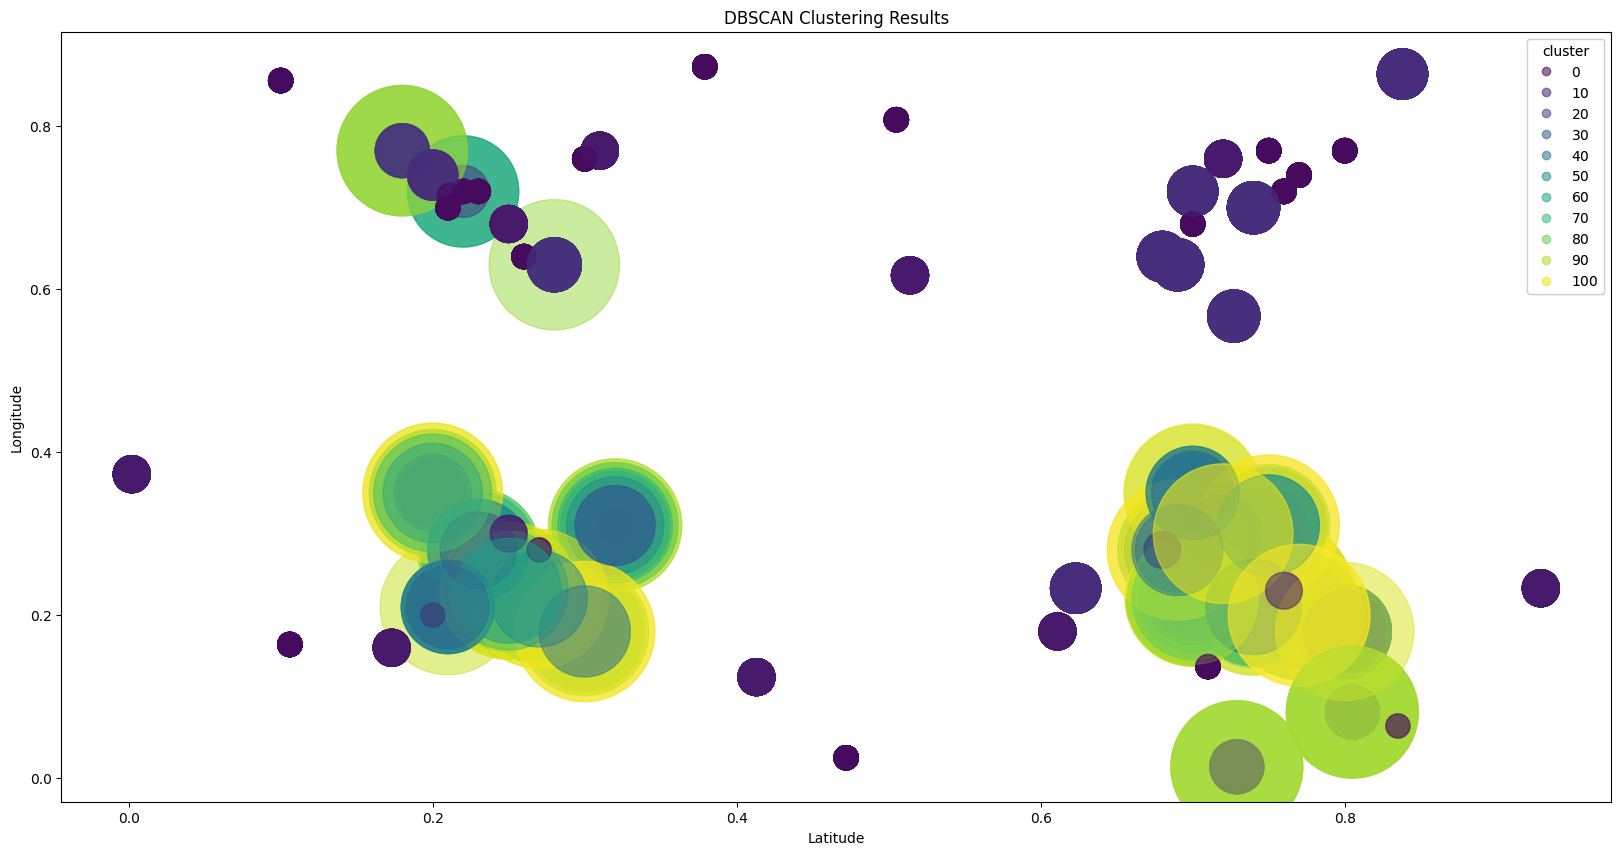

In [69]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/Environment_Solar_Data.csv')

model = DBSCAN(eps=5, min_samples=2)

X = df[['sunshine_hours', 'land_prices', 'Latitude', 'Longitude', 'Avg.Wind_Speed']]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
model.fit(X_imputed)

df['cluster'] = model.labels_
df.to_csv('output_custer_DBSCAN.csv', index=False)
fig, ax = plt.subplots()
scatter = ax.scatter(df['Latitude'], df['Longitude'], c=df['cluster'], s=((df['cluster']+1)*100), marker='o', alpha = 0.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="cluster")
ax.add_artist(legend1)
ax.set_title('DBSCAN Clustering Results')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv('output_custer.csv')

X = df[['sunshine_hours', 'land_prices', 'Latitude', 'Longitude', 'Avg.Wind_Speed']]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

y = df['cluster_with_ws']
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.15, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.40637422079286495
Mean Squared Error: 0.23528705403515945
R2 Score: 0.8627079684415551


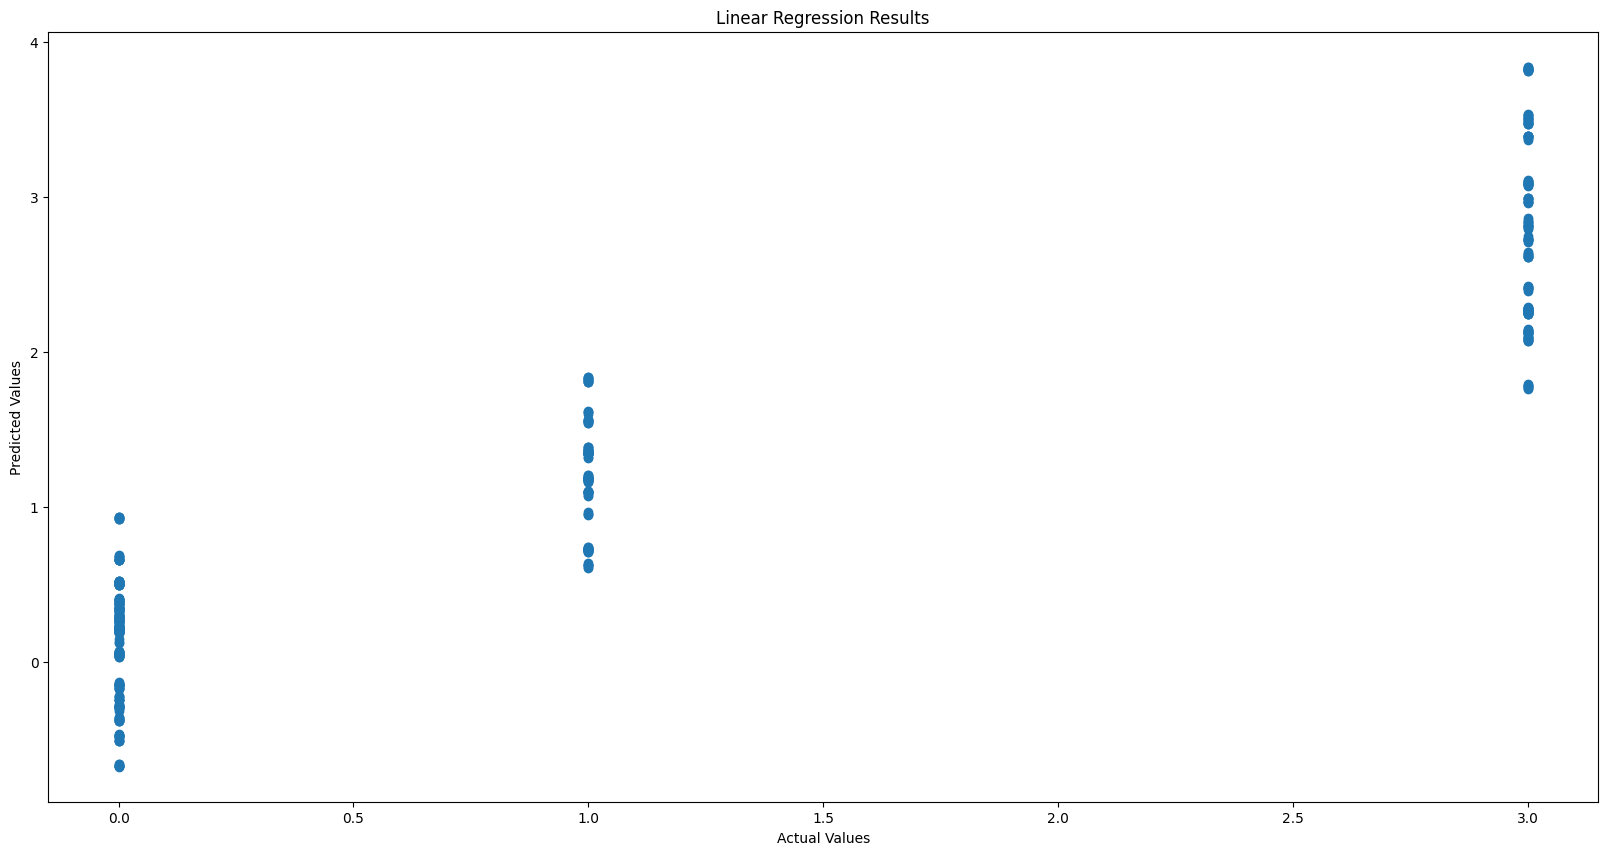

In [71]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')

plt.show()


In [72]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.hist(residuals, bins=50)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residuals Histogram')

plt.show()

In [54]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')

plt.show()
print(y_pred[400])


0.2521443717801568
